In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from autofeat import AutoFeatRegressor, FeatureSelector
from sklearn.datasets import load_wine

data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target 
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [4]:
X = df.drop(columns=["target"])
y = df["target"]

afreg = AutoFeatRegressor(verbose=1, feateng_steps=3, n_jobs=-1)
df = afreg.fit_transform(X, y)
print("Final R^2: %.4f" % afreg.score(X, y))
plt.figure()

2025-08-08 12:31:42,841 INFO: [AutoFeat] The 3 step feature engineering process could generate up to 102466 features.
2025-08-08 12:31:42,842 INFO: [AutoFeat] With 178 data points this new feature matrix would use about 0.07 gb of space.
2025-08-08 12:31:42,843 INFO: [feateng] Step 1: transformation of original features


[feateng]               0/             13 features transformed

2025-08-08 12:31:43,743 INFO: [feateng] Generated 73 transformed features from 13 original features - done.
2025-08-08 12:31:43,746 INFO: [feateng] Step 2: first combination of features


[feateng]            3500/           3655 feature tuples combined

2025-08-08 12:31:49,361 INFO: [feateng] Generated 14457 feature combinations from 3655 original feature tuples - done.
2025-08-08 12:31:49,372 INFO: [feateng] Step 3: transformation of new features


[feateng]           14300/          14457 features transformedned

2025-08-08 12:32:33,795 INFO: [feateng] Generated 64515 transformed features from 14457 original features - done.


[feateng]           14400/          14457 features transformed

2025-08-08 12:32:33,879 INFO: [feateng] Generated altogether 82804 new features in 3 steps
2025-08-08 12:32:33,879 INFO: [feateng] Removing correlated features, as well as additions at the highest level
2025-08-08 12:32:34,329 INFO: [feateng] Generated a total of 34911 additional features


[featsel] Scaling data...done.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


2025-08-08 12:32:44,729 INFO: [featsel] Feature selection run 3/5
2025-08-08 12:32:44,729 INFO: [featsel] Feature selection run 4/5
2025-08-08 12:32:46,456 INFO: [featsel] Feature selection run 1/5
2025-08-08 12:32:46,567 INFO: [featsel] Feature selection run 2/5
2025-08-08 12:32:47,115 INFO: [featsel] Feature selection run 5/5


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   51.2s
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   55.0s remaining:  1.4min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  2.2min remaining:  1.4min


2025-08-08 12:35:45,251 INFO: [featsel] 82 features after 5 feature selection runs
/mnt/c/Users/james/projects/auto-feature-engineering/.venv/lib/python3.10/site-packages/autofeat/featsel.py:270: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  if np.max(np.abs(correlations[c].ravel()[:i])) < 0.9:
2025-08-08 12:35:45,282 INFO: [featsel] 56 features after correlation filtering


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.1min finished


2025-08-08 12:35:45,979 INFO: [featsel] 25 features after noise filtering
2025-08-08 12:35:45,982 INFO: [AutoFeat] Computing 25 new features.


[AutoFeat]    22/   25 new features

2025-08-08 12:35:47,718 INFO: [AutoFeat]    25/   25 new features ...done.
2025-08-08 12:35:47,736 INFO: [AutoFeat] Final dataframe with 38 feature columns (25 new).
2025-08-08 12:35:47,737 INFO: [AutoFeat] Training final regression model.
2025-08-08 12:35:47,754 INFO: [AutoFeat] Trained model: largest coefficients:
2025-08-08 12:35:47,754 INFO: 1.5802344898804805
2025-08-08 12:35:47,755 INFO: -0.009301 * ash**3*log(od280od315_of_diluted_wines)**3
2025-08-08 12:35:47,756 INFO: 0.006000 * 1/(flavanoids**2 - 1/color_intensity)
2025-08-08 12:35:47,756 INFO: 0.005970 * (flavanoids**2 - sqrt(magnesium))**2
2025-08-08 12:35:47,757 INFO: -0.004084 * 1/(hue**2 - log(ash))
2025-08-08 12:35:47,757 INFO: 0.001593 * 1/(log(ash) - 1/flavanoids)
2025-08-08 12:35:47,758 INFO: -0.001120 * proline*exp(-1/flavanoids)
2025-08-08 12:35:47,759 INFO: -0.000734 * 1/(nonflavanoid_phenols**2 + log(flavanoids))
2025-08-08 12:35:47,759 INFO: -0.000244 * alcohol**3*log(od280od315_of_diluted_wines)
2025-08-08 12:3

Final R^2: 0.9054   25 new features


/mnt/c/Users/james/projects/auto-feature-engineering/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
2025-08-08 12:35:47,885 INFO: [AutoFeat] Computing 25 new features.
2025-08-08 12:35:47,906 INFO: [AutoFeat]    25/   25 new features ...done.


[AutoFeat]    24/   25 new features

NameError: name 'target' is not defined

<Figure size 640x480 with 0 Axes>

/mnt/c/Users/james/projects/auto-feature-engineering/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
2025-08-08 12:37:54,560 INFO: [AutoFeat] Computing 25 new features.
2025-08-08 12:37:54,583 INFO: [AutoFeat]    25/   25 new features ...done.


[AutoFeat]    24/   25 new features

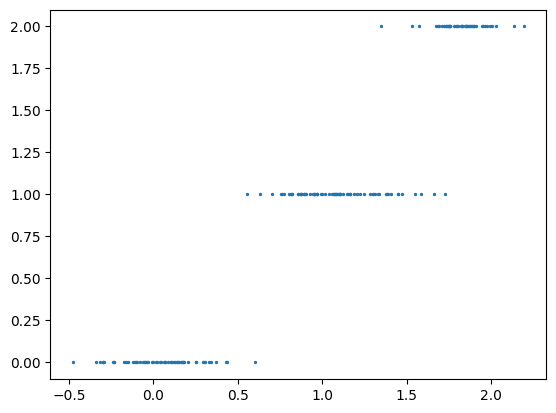

In [5]:
plt.scatter(afreg.predict(X), y, s=2);

In [11]:
afreg.transform(X)

/mnt/c/Users/james/projects/auto-feature-engineering/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
2025-08-08 12:39:34,206 INFO: [AutoFeat] Computing 25 new features.
2025-08-08 12:39:34,229 INFO: [AutoFeat]    25/   25 new features ...done.


[AutoFeat]    24/   25 new features

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,...,1/(log(ash) - 1/flavanoids),alcohol**3*sqrt(flavanoids),1/(alcohol - exp(malic_acid)),1/(hue**2 - sqrt(malic_acid)),log(alcalinity_of_ash**3/proline),(flavanoids**2 - sqrt(magnesium))**2,exp(-malic_acid**3 + proanthocyanins),1/(flavanoids**2 - 1/color_intensity),ash**3*log(od280od315_of_diluted_wines)**3,Abs(sqrt(od280od315_of_diluted_wines) - 1/proanthocyanins)
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,...,1.782233,5040.520826,0.114929,-4.423415,1.271083,3.632179,6.652277e-02,0.108858,36.581233,1.543218
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,...,2.509492,3820.993815,0.137549,-4.316552,0.291196,5.675830,1.278156e-02,0.135331,17.961662,1.062659
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,...,1.484921,4102.420493,0.389249,-2.103805,1.691987,0.200457,3.250047e-05,0.096885,29.231300,1.424577
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,...,1.587912,5543.486802,0.136215,-1.522478,1.164339,2.402358,5.327490e-03,0.082975,29.673976,1.398702
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,...,1.465062,3806.624998,-11.139380,-1.894845,2.533697,13.152811,1.757894e-07,0.142763,29.367976,1.162274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,...,-1.345431,2012.691822,-0.003696,-0.508292,2.454624,87.884894,1.349201e-78,4.128310,2.498949,0.375694
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,...,-2.352527,2083.747188,-0.027398,-0.672327,2.786409,90.954463,4.485013e-26,2.350101,1.341266,0.539780
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,...,-1.577510,1941.052643,-0.016958,-0.581153,2.259765,109.795843,3.438864e-34,2.645077,1.015045,0.508259
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,...,-1.645553,1883.700189,-6.258935,-0.800418,2.253795,110.083137,1.226441e-07,2.817909,1.494643,0.587861
